## Erode Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@7b00c550

This op performs [morphological erosion](https://en.wikipedia.org/wiki/Erosion_(morphology)) on any binary image. Let's see how the `Op` is called:

In [2]:
ij.op().help("erode")

Available operations:
	(IterableInterval out?) =
	net.imagej.ops.morphology.erode.DefaultErode(
		IterableInterval out?,
		RandomAccessibleInterval in1,
		Shape in2,
		boolean isFull?,
		OutOfBoundsFactory f?)
	(IterableInterval out?) =
	net.imagej.ops.morphology.erode.ListErode(
		IterableInterval out?,
		RandomAccessibleInterval in1,
		List in2,
		boolean isFull?)

Note the parameters here:

* `IterableInterval out`: the output image
* `RandomAccessibleInterval in1`: the input image
* `Shape in2`: the [`Shape`](http://javadoc.scijava.org/ImgLib2/net/imglib2/algorithm/neighborhood/Shape.html) that the `Op` will use to dilate each edge point of a structure. Note that in the Wikipedia article linked in the previous cell a circle was used; there are many other options (such as a rectangle) that are also available in ImageJ-Ops.
* `List in2`: this parameter, only used in `ListErode`, contains a list of `Shape`s each used once in a series of erosions (i.e. for each `Shape` in the `List` call `DefaultErode` using the input (from the last `erode` if not the first) and that `Shape`)
* `boolean isFull`: an **optional** parameter that the user can set to tell the `Op` if the **dimensions of the output** are bigger than the dimensions of the input **plus** the radius of the `Shape` parameter. This parameter should **never** be set to true if **no output is given**, since this will cause the output to be translated and therefore inaccurate.
* `OutOfBoundsFactory f`: an **optional** parameter that tells the `Op` how to extend the input (so that the `Shape` can be applied outside each of the input's edge values without error). If no `OutOfBoundsFactory` is given all values outside the input `Interval` are set to the "off" value of the binary image.

We need to get a binary image to perform any morphological operations. Let's get a grayscale image and then binarize it using [the Huang Threshold Op](../threshold/threshold.ipynb#Huang-Thresholding):

[INFO] Verifying GIF format
[INFO] Reading dimensions
[INFO] Reading data blocks


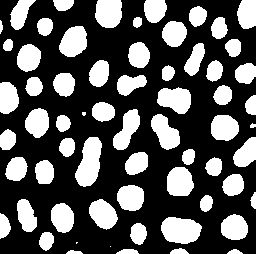

In [3]:
input_full = ij.scifio().datasetIO().open("http://imagej.net/images/blobs.gif")

//input_full has 3 channels. We only need one.
input = ij.op().run("hyperSliceView", input_full, 2, 0)

//invert the image so that the blobs are "on" and the background "off"
inverted = ij.op().run("create.img", input)
ij.op().run("invert", inverted, input)

binaryInput = ij.op().run("threshold.huang", inverted)

ij.notebook().display(binaryInput)

Now that we have our image, let's erode it :

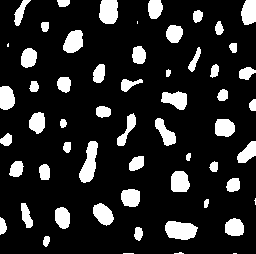

In [4]:
import net.imglib2.algorithm.neighborhood.HyperSphereShape

//create the shape that we are going to dilate the image with
shape = new HyperSphereShape(4)

output = ij.op().run("erode", null, binaryInput, shape, false)

ij.notebook().display(output)

To show the difference, let's [stack](../transform/stackView.ipynb) the images to see the difference:

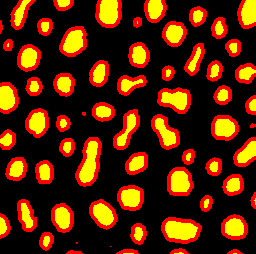

In [5]:
import net.imglib2.img.Img

list = new ArrayList<Img>()
 
list.add(binaryInput)
list.add(output)

stacked = ij.op().run("stackView", list)

ij.notebook().display(stacked)

Note the yellow regions, where the red original image and the green eroded image are the same, as well as the red borders that show where the erosion occurred.